In [6]:
import pandas as pd
import numpy as np

## Анализ данных:
- признаки клиентов
- группы клиентов
- распределение признаков и т.д.

In [4]:
df_data = pd.read_csv('/Users/alexeylyubeznyy/Documents/Магистратура/МФТИ/Большие данные в финансах/7. Uplift & CLTV/uplift_synthetic_data_100trials.csv')
df_model = df_data.copy()
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 43 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1000000 non-null  int64  
 1   trial_id                    1000000 non-null  int64  
 2   treatment_group_key         1000000 non-null  object 
 3   conversion                  1000000 non-null  int64  
 4   control_conversion_prob     1000000 non-null  float64
 5   treatment1_conversion_prob  1000000 non-null  float64
 6   treatment1_true_effect      1000000 non-null  float64
 7   x1_informative              1000000 non-null  float64
 8   x2_informative              1000000 non-null  float64
 9   x3_informative              1000000 non-null  float64
 10  x4_informative              1000000 non-null  float64
 11  x5_informative              1000000 non-null  float64
 12  x6_informative              1000000 non-null  float64
 13

In [8]:
df_model.describe(include=np.object)

/var/folders/2s/xq0lwmvd4f3dzg32wt2s0h180000gn/T/ipykernel_78278/1275745543.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_model.describe(include=np.object)


,treatment_group_key
count,1000000
unique,2
top,control
freq,500000


In [10]:
df_model.describe()

,Unnamed: 0,trial_id,conversion,control_conversion_prob,treatment1_conversion_prob,treatment1_true_effect,x1_informative,x2_informative,x3_informative,x4_informative,...,x27_irrelevant,x28_irrelevant,x29_irrelevant,x30_irrelevant,x31_uplift_increase,x32_uplift_increase,x33_uplift_increase,x34_uplift_increase,x35_uplift_increase,x36_uplift_increase
count,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,499999.500000,49.500000,0.303751,2.468870e-01,3.578297e-01,0.110943,-0.001585,0.000352,0.001122,0.000614,...,0.000576,0.001231,0.000126,0.001802,0.001091,-0.000561,-0.000631,-0.002048,-0.000812,-0.000485
std,288675.278933,28.866084,0.459877,1.830385e-01,2.708744e-01,0.204681,0.999992,0.999010,1.000144,1.000122,...,0.999560,1.000151,1.000623,0.999905,0.999221,1.000478,1.000570,1.001089,0.999603,1.001170
min,0.000000,0.000000,0.000000,2.288396e-09,1.175754e-09,-0.956496,-4.823255,-4.941324,-4.882931,-4.780078,...,-5.120303,-5.140377,-5.159731,-4.770722,-5.100907,-4.861011,-4.996519,-4.700921,-4.992746,-5.201127
25%,249999.750000,24.750000,0.000000,1.069080e-01,1.235272e-01,-0.026364,-0.675506,-0.674350,-0.674476,-0.673506,...,-0.673947,-0.673118,-0.674916,-0.673377,-0.674114,-0.674886,-0.675591,-0.676792,-0.675237,-0.676235
50%,499999.500000,49.500000,0.000000,2.000460e-01,2.936363e-01,0.065494,-0.000660,0.000091,-0.000335,-0.000206,...,0.000126,0.001092,-0.000365,0.002118,-0.000867,-0.001465,-0.000773,-0.002646,-0.000931,0.000112
75%,749999.250000,74.250000,1.000000,3.430530e-01,5.572790e-01,0.232868,0.672818,0.673720,0.675828,0.675615,...,0.674314,0.675843,0.674404,0.675787,0.675840,0.673904,0.673517,0.672510,0.674789,0.674888
max,999999.000000,99.000000,1.000000,1.000000e+00,1.000000e+00,0.985236,4.700681,4.661994,4.842620,5.207952,...,4.834968,4.654189,4.806631,5.091749,4.644083,5.144347,4.760025,4.589164,4.952605,4.452098


In [9]:
df_model.head()

,Unnamed: 0,trial_id,treatment_group_key,conversion,control_conversion_prob,treatment1_conversion_prob,treatment1_true_effect,x1_informative,x2_informative,x3_informative,...,x27_irrelevant,x28_irrelevant,x29_irrelevant,x30_irrelevant,x31_uplift_increase,x32_uplift_increase,x33_uplift_increase,x34_uplift_increase,x35_uplift_increase,x36_uplift_increase
0,0,0,control,1,0.516606,0.572609,0.056002,-1.926651,1.233472,-0.475120,...,-0.378145,-0.110782,1.087180,-1.222069,-0.279009,1.013911,-0.570859,-1.158216,-1.336279,-0.708056
1,1,0,treatment1,1,0.304005,0.736460,0.432454,0.904364,0.868705,-0.285977,...,-0.742847,0.700239,0.001867,-0.069362,0.045789,1.364182,-0.261643,0.478074,0.531477,0.402723
2,2,0,treatment1,0,0.134277,0.480985,0.346709,1.680978,1.320889,0.059273,...,0.748884,-0.856898,-0.268034,-2.181874,1.473214,-1.256641,0.901139,2.029204,-0.280445,0.873970
3,3,0,treatment1,1,0.801968,0.858532,0.056563,-0.335774,-2.940232,-0.302521,...,0.151074,0.067547,-0.839246,0.587575,0.412081,0.141189,0.369611,-0.364984,-1.509045,-1.335023
4,4,0,control,0,0.063552,0.060142,-0.003410,-0.475881,-0.485793,0.978582,...,-1.287117,1.256396,-1.155307,-0.414787,1.163851,0.698114,0.088157,0.478717,-0.680588,-2.730850


In [24]:
for column in df_model.columns:
    print(column,'\n',df_model[column].unique(),'\n')

Unnamed: 0 
 [     0      1      2 ... 999997 999998 999999] 

trial_id 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] 

treatment_group_key 
 ['control' 'treatment1'] 

conversion 
 [1 0] 

control_conversion_prob 
 [0.51660648 0.30400542 0.13427651 ... 0.34853485 0.23027452 0.47833233] 

treatment1_conversion_prob 
 [0.57260855 0.73645974 0.48098534 ... 0.18436148 0.41989234 0.73920785] 

treatment1_true_effect 
 [ 0.05600207  0.43245432  0.34670883 ... -0.16417337  0.18961782
  0.26087551] 

x1_informative 
 [-1.92665069  0.90436389  1.68097752 ...  0.83260801 -0.11020974
  0.76714114] 

x2_informative 
 [ 1.233472    0.86870465  1.32088851 ... -1.36376384  0.34258196
  0.42855772] 

x3_informative 
 [-0.47512021 -0.28597739  

## Разделим выборки для обучения модели

In [25]:
def declare_tc(df:pd.DataFrame):
    # Control Non-Responders - не перейдут без воздействия
    df['target_class'] = 0
    
    # Control Responders - перейдет без воздействия
    df.loc[(df_model['conversion'] == 1) & (df['treatment_group_key'] == 'control'), 'target_class'] = 1
    
    # Treatment Non-Responders - не перешли, хотя было воздействие
    df.loc[(df_model['conversion'] == 0) & (df['treatment_group_key'] == 'treatment1'), 'target_class'] = 2
    
    # Treatment Responders - перешли из-за воздействия
    df.loc[(df_model['conversion'] == 1) & (df['treatment_group_key'] == 'treatment1'), 'target_class'] = 3
    
    return df

In [26]:
df_model = declare_tc(df_model)

In [27]:
df_model.head()

,Unnamed: 0,trial_id,treatment_group_key,conversion,control_conversion_prob,treatment1_conversion_prob,treatment1_true_effect,x1_informative,x2_informative,x3_informative,...,x28_irrelevant,x29_irrelevant,x30_irrelevant,x31_uplift_increase,x32_uplift_increase,x33_uplift_increase,x34_uplift_increase,x35_uplift_increase,x36_uplift_increase,target_class
0,0,0,control,1,0.516606,0.572609,0.056002,-1.926651,1.233472,-0.475120,...,-0.110782,1.087180,-1.222069,-0.279009,1.013911,-0.570859,-1.158216,-1.336279,-0.708056,1
1,1,0,treatment1,1,0.304005,0.736460,0.432454,0.904364,0.868705,-0.285977,...,0.700239,0.001867,-0.069362,0.045789,1.364182,-0.261643,0.478074,0.531477,0.402723,3
2,2,0,treatment1,0,0.134277,0.480985,0.346709,1.680978,1.320889,0.059273,...,-0.856898,-0.268034,-2.181874,1.473214,-1.256641,0.901139,2.029204,-0.280445,0.873970,2
3,3,0,treatment1,1,0.801968,0.858532,0.056563,-0.335774,-2.940232,-0.302521,...,0.067547,-0.839246,0.587575,0.412081,0.141189,0.369611,-0.364984,-1.509045,-1.335023,3
4,4,0,control,0,0.063552,0.060142,-0.003410,-0.475881,-0.485793,0.978582,...,1.256396,-1.155307,-0.414787,1.163851,0.698114,0.088157,0.478717,-0.680588,-2.730850,0


**Uplift Score = P(TR)/P(T) + P(CN)/P(C) - P(TN)/P(T) - P(CR)/P(C)**

In [30]:
import sys
!{sys.executable} -m pip install xgboost

     |████████████████████████████████| 2.2 MB 1.1 MB/s eta 0:00:01


## Разделение на обучающую и тестовую выборку

In [31]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
def uplift_split(df_model:pd.DataFrame):
    # Train-test Split
    X = df_model.drop(['conversion', 'target_class'], axis=1)
    y = df_model.target_class
    X_train, X_test, \
    y_train, y_test = train_test_split(X,
                                      y,
                                      test_size=0.3,
                                      random_state=42,
                                      stratify=df_model['treatment_group_key'])
    return X_train, X_test, y_train, y_test

## Обучение модели XGBClassifier

In [32]:
def uplift_model(X_train:pd.DataFrame,
                 X_test:pd.DataFrame,
                 y_train:pd.DataFrame,
                 y_test:pd.DataFrame):
    """Using XGB to get the uplift score
    """
    # Create new dataframe
    result = pd.DataFrame(X_test).copy()    
    # Fit the model
    uplift_model \
    = xgb.XGBClassifier().fit(X_train.drop('treatment_group_key', axis=1), y_train)
    
    
    # Predict using test-data
    uplift_proba \
    = uplift_model.predict_proba(X_test.drop('treatment_group_key', axis=1))
    result['proba_CN'] = uplift_proba[:,0] 
    result['proba_CR'] = uplift_proba[:,1] 
    result['proba_TN'] = uplift_proba[:,2] 
    result['proba_TR'] = uplift_proba[:,3]
    result['uplift_score'] = result.eval('\
    proba_CN/(proba_CN+proba_CR) \
    + proba_TR/(proba_TN+proba_TR) \
    - proba_TN/(proba_TN+proba_TR) \
    - proba_CR/(proba_CN+proba_CR)')  
    # Put the result 
    result['target_class'] = y_test
    return result


def uplift(df_model:pd.DataFrame):
    """Combine the split and Modeling function
    """
    X_train, X_test, y_train, y_test = uplift_split(df_model)
    result = uplift_model(X_train, X_test, y_train, y_test)
    return result

In [33]:
# Run the uplift function
uplift = uplift(df_model)

## Оценка качества построенной модели

Оценка модели - кривая QINI
QINI (Uplift value) вычислыется как:

QINI = TR - [(CR*T)/C]

или в процентах:

QINI = (TR/T) - (CR/C)

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Functions to build the Uplift model and visualize the QINI Curve
def qini_rank(uplift:pd.DataFrame):
    """Rank the data by the uplift score
    """
    # Creat new dataframe
    ranked = pd.DataFrame({'n':[], 'target_class':[]})
    ranked['target_class'] = uplift['target_class']
    ranked['uplift_score'] = uplift['uplift_score']
    
    
    # Add proportion
    ranked['n'] = ranked.uplift_score.rank(pct=True, ascending=False)
    # Data Ranking   
    ranked = ranked.sort_values(by='n').reset_index(drop=True)
    return ranked


def qini_eval(ranked:pd.DataFrame):
    """Evaluate the uplift value with the QINI criterion
    """
    uplift_model, random_model = ranked.copy(), ranked.copy()
    # Using Treatment and Control Group to calculate the uplift (Incremental gain)
    C, T = sum(ranked['target_class'] <= 1), sum(ranked['target_class'] >= 2)
    ranked['cr'] = 0
    ranked['tr'] = 0
    ranked.loc[ranked.target_class == 1,'cr'] = 1
    ranked.loc[ranked.target_class == 3,'tr'] = 1
    ranked['cr/c'] = ranked.cr.cumsum() / C
    ranked['tr/t'] = ranked.tr.cumsum() / T
    # Calculate and put the uplift and random value into dataframe
    uplift_model['uplift'] = round(ranked['tr/t'] - ranked['cr/c'],5)
    random_model['uplift'] = round(ranked['n'] * uplift_model['uplift'].iloc[-1],5)
    
    
    # Add q0
    q0 = pd.DataFrame({'n':0, 'uplift':0, 'target_class': None}, index =[0])
    uplift_model = pd.concat([q0, uplift_model]).reset_index(drop = True)
    random_model = pd.concat([q0, random_model]).reset_index(drop = True)  
    # Add model name & concat
    uplift_model['model'] = 'Uplift model'
    random_model['model'] = 'Random model'
    merged = pd.concat([uplift_model, random_model]).sort_values(by='n').reset_index(drop = True)
    return merged


def qini_plot(merged:pd.DataFrame):
    """Plot the QINI
    """
    # plot the data
    ax = sns.lineplot(x='n', y='uplift', hue='model', data=merged,
                      style='model', palette=['red','grey'])
    
    
    # Plot settings
    sns.set_style('whitegrid')
    handles, labels = ax.get_legend_handles_labels()
    plt.xlabel('Proportion targeted',fontsize=15)
    plt.ylabel('Uplift',fontsize=15)
    plt.subplots_adjust(right=1)
    plt.subplots_adjust(top=1)
    plt.legend(fontsize=12)
    ax.tick_params(labelsize=15)
    ax.legend(handles=handles[1:], labels=labels[1:], loc='upper right')
    return ax


def qini(uplift:pd.DataFrame):
    """Combine all functions
    """
    ranked = qini_rank(uplift)
    merged = qini_eval(ranked)
    ax = qini_plot(merged)
    return ax

Кривая QINI показывает, что применение uplift модели для выбора клиентов для взаимодействия показывает лучшие результаты чем случайная модель.

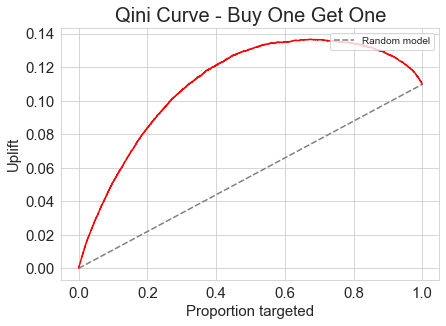

In [39]:
# plot the Qini curve for BOGO treatment
qini(uplift)
plt.title('Qini Curve - Buy One Get One',fontsize=20)
plt.show()